Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

**Cargo el archivo a mano desde las opciones de la izquierda.**

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’




In [ ]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [ ]:
mi_airbnb <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

In [ ]:
head(mi_airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Madrid,Entire home/apt,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,Madrid,Entire home/apt,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,Madrid,Entire home/apt,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Madrid,Entire home/apt,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Madrid,Entire home/apt,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,Madrid,Entire home/apt,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [ ]:
df_madrid<-subset(mi_airbnb,(City=="Madrid") & (Room.Type=="Entire home/apt") & (Neighbourhood!=""))

In [ ]:
df_madrid <- df_madrid[,c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

In [ ]:
summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms     
 Length:5601        Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.000  
                    Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                    Max.   :16.000   Max.   :6.500   Max.   :10.000  
                                     NA's   :14      NA's   :7       
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 237.0   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 392.6   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [ ]:
df_madrid$Square.Meters<-df_madrid$Square.Feet*0.092903

In [ ]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA


In [ ]:
df_madrid <- df_madrid[,c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Meters','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [ ]:
apartamentosNA<-sum(is.na(df_madrid$Square.Meters))
print(apartamentosNA)

[1] 5254


In [ ]:
apartamentostotales<-length(df_madrid$Square.Meters)
print(apartamentostotales)

[1] 5601


In [ ]:
print(paste("El porcentaje es:",(apartamentosNA/apartamentostotales)*100,"%"))

[1] "El porcentaje es: 93.8046777361185 %"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [ ]:
apartdiferentNA<-na.omit(df_madrid$Square.Meters)
napartdiferentNA = (length(apartdiferentNA))
napartdiferentNA

[1] 347

In [ ]:
apartdiferentNA0m<-apartdiferentNA=="0"
napartdiferentNA0m = sum(apartdiferentNA0m)
napartdiferentNA0m

[1] 128

In [ ]:
print(paste("El porcentaje es:", (napartdiferentNA0m/napartdiferentNA)*100,"%"))

[1] "El porcentaje es: 36.8876080691643 %"


Reemplazar todos los 0m^2 por NA 

In [ ]:
df_madrid$Square.Meters[df_madrid$Square.Meters=="0"] <- NA

In [ ]:
sum(is.na(df_madrid$Square.Meters))

[1] 5382

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

In [ ]:
library(ggplot2)
library(tidyverse)
library(GGally)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


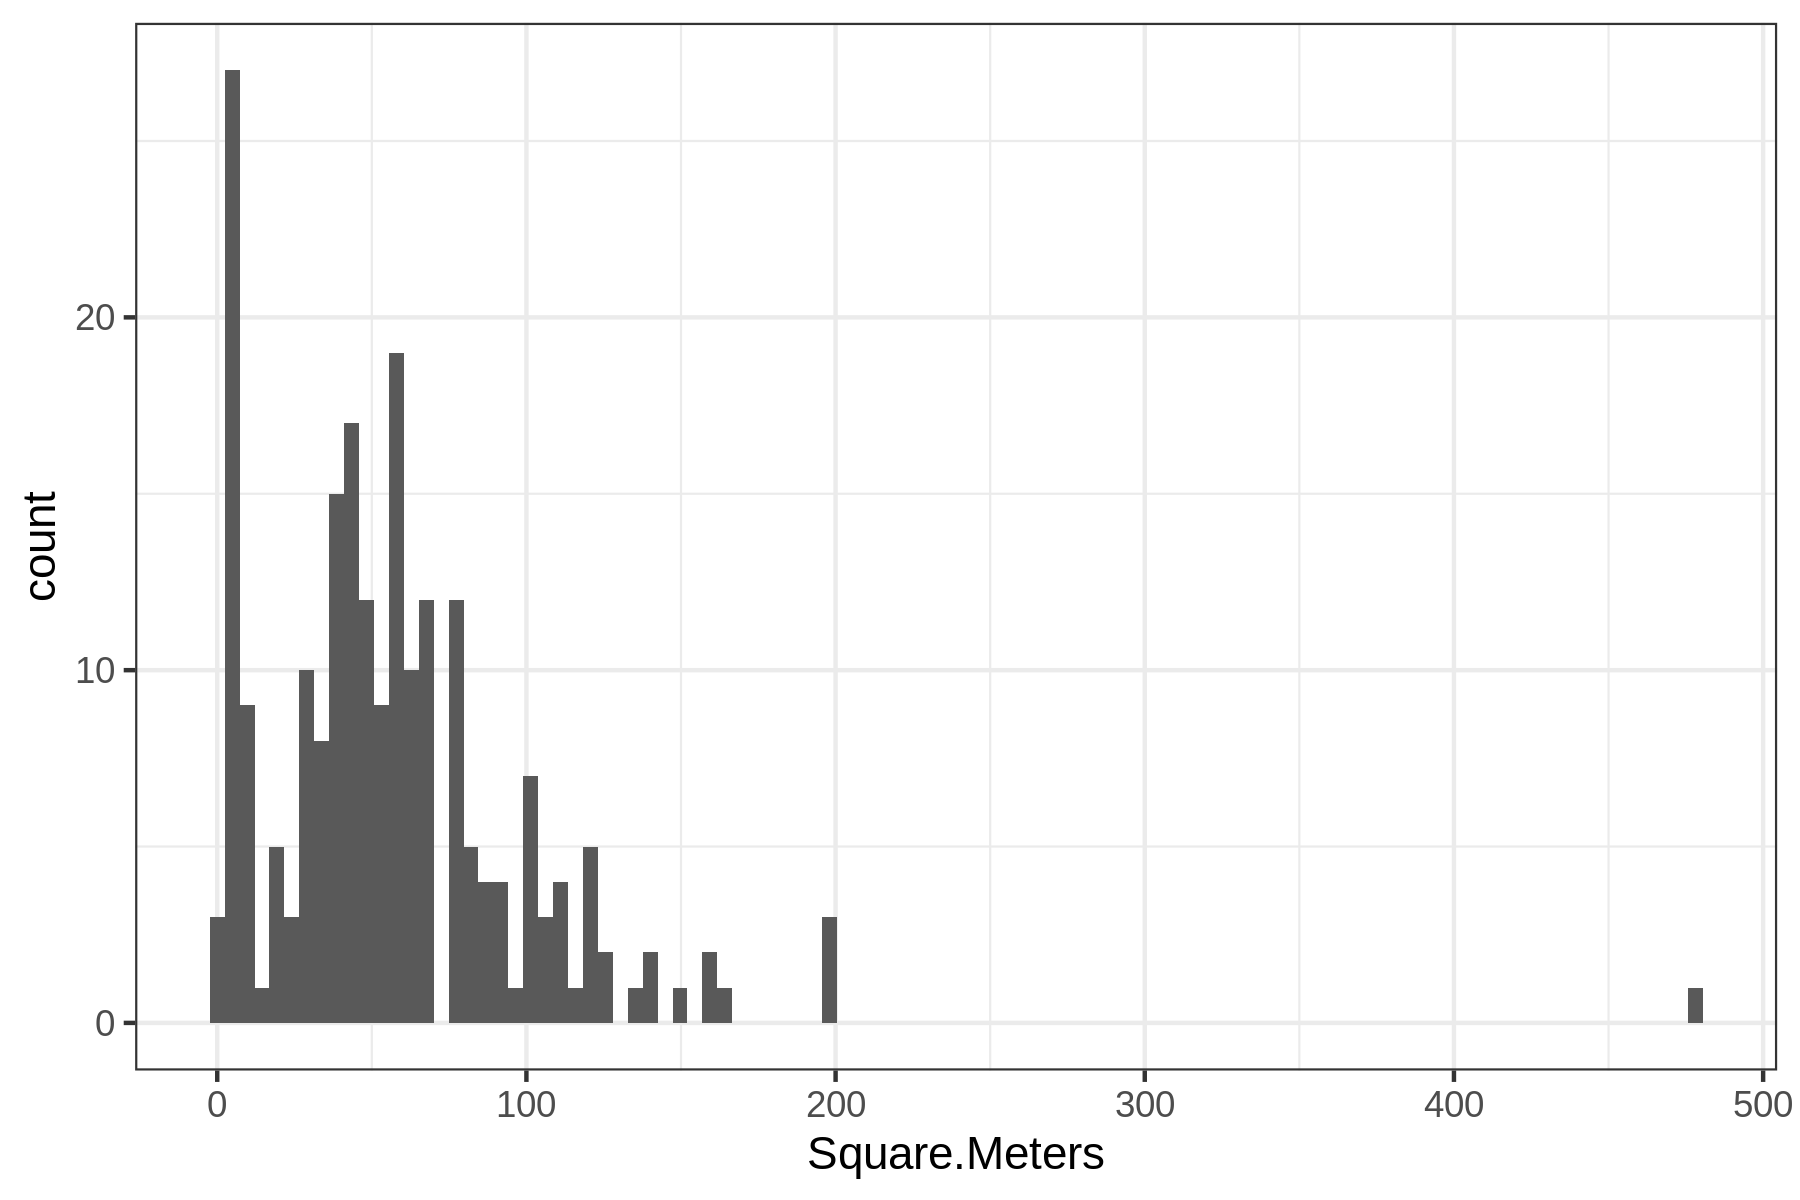

In [ ]:
ggplot(df_madrid, aes(x=Square.Meters))+geom_histogram(bins=100)+theme_bw()

A 480 metros cuadrados observamos un valor atípico descartable.
Podríamos descartar también los valores que estén por debajo de 20 metros cuadrados. 

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2 y más de 300 m^2.

In [ ]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20] <- NA
df_madrid$Square.Meters[df_madrid$Square.Meters>300] <- NA

Warning message:
“Removed 5428 rows containing non-finite values (stat_bin).”


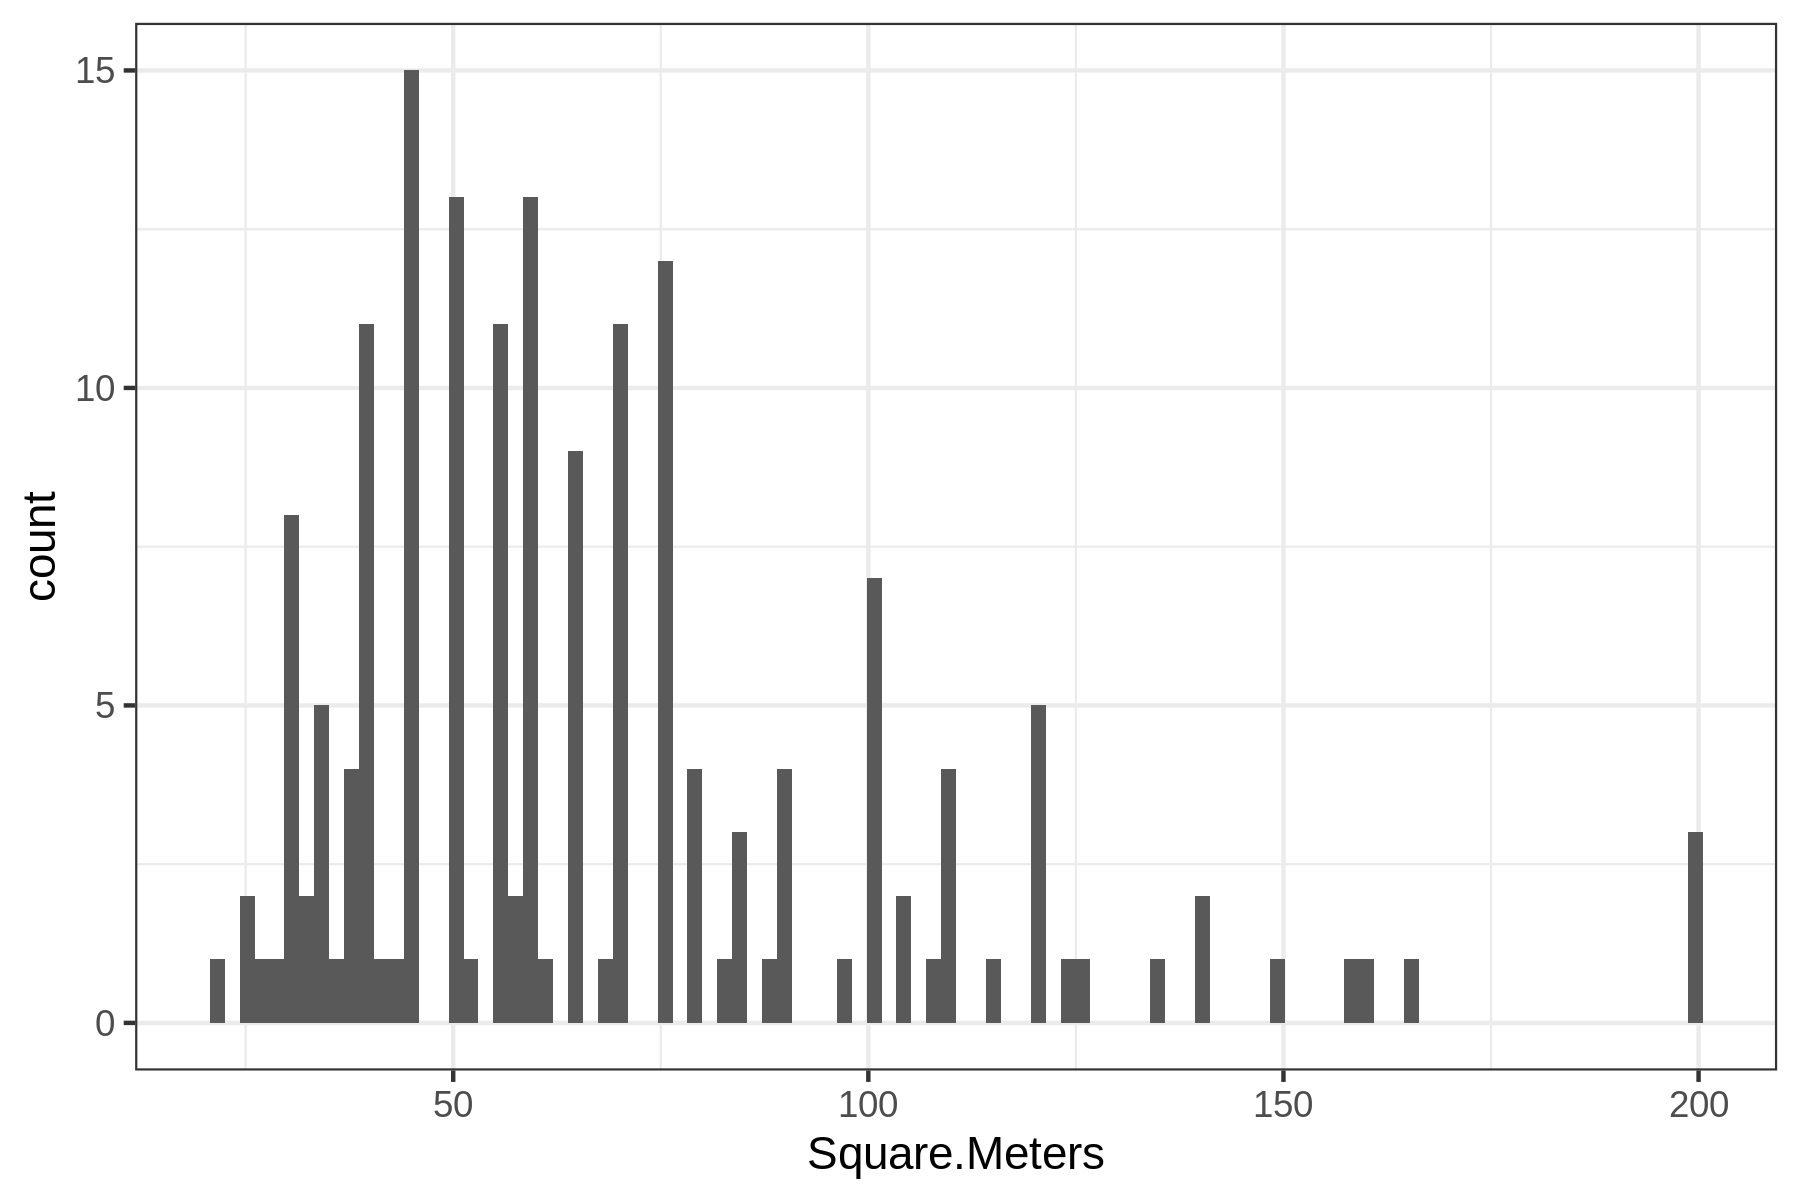

In [ ]:
ggplot(df_madrid, aes(x=Square.Meters))+geom_histogram(bins=100)+theme_bw()

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [ ]:
neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)

In [ ]:
sum(apply(df_madrid,1,function(x) any(is.na(x))))

[1] 5437

In [ ]:
dim(df_madrid[,c("Neighbourhood","Square.Meters")])
unique(na.omit(df_madrid[,c("Neighbourhood","Square.Meters")])$Neighbourhood)

[1] 5601    2

[1] "La Latina"        "Acacias"          "Malasaña"         "Recoletos"       
 [5] "Argüelles"        "Justicia"         "Sol"              "Lista"           
 [9] "Carabanchel"      "Embajadores"      "Palos do Moguer"  "Trafalgar"       
[13] "San Blas"         "Almenara"         "Palacio"          "Arapiles"        
[17] "Usera"            "Pacifico"         "Cuatro Caminos"   "Cortes"          
[21] "Retiro"           "Goya"             "Fuente del Berro" "Castilla"        
[25] "Rios Rosas"       "Castellana"       "Almagro"          "Adelfas"         
[29] "El Tréntaiseis"   "Barajas"          "El Viso"          "Chamberí"        
[33] "Centro"           "Ciudad Lineal"    "Ciudad Jardin"    "Jerónimos"       
[37] "Moratalaz"        "Vicálvaro"

In [ ]:
#los elimino
neighb_all_na <- df_madrid %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)
df_madrid <- df_madrid[!df_madrid$Neighbourhood %in% neighb_all_na$Neighbourhood,]
paste("Quedan ",length(unique(df_madrid$Neighbourhood)),"barrios")
dim(df_madrid)

[1] "Quedan  38 barrios"

[1] 4901   12

In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




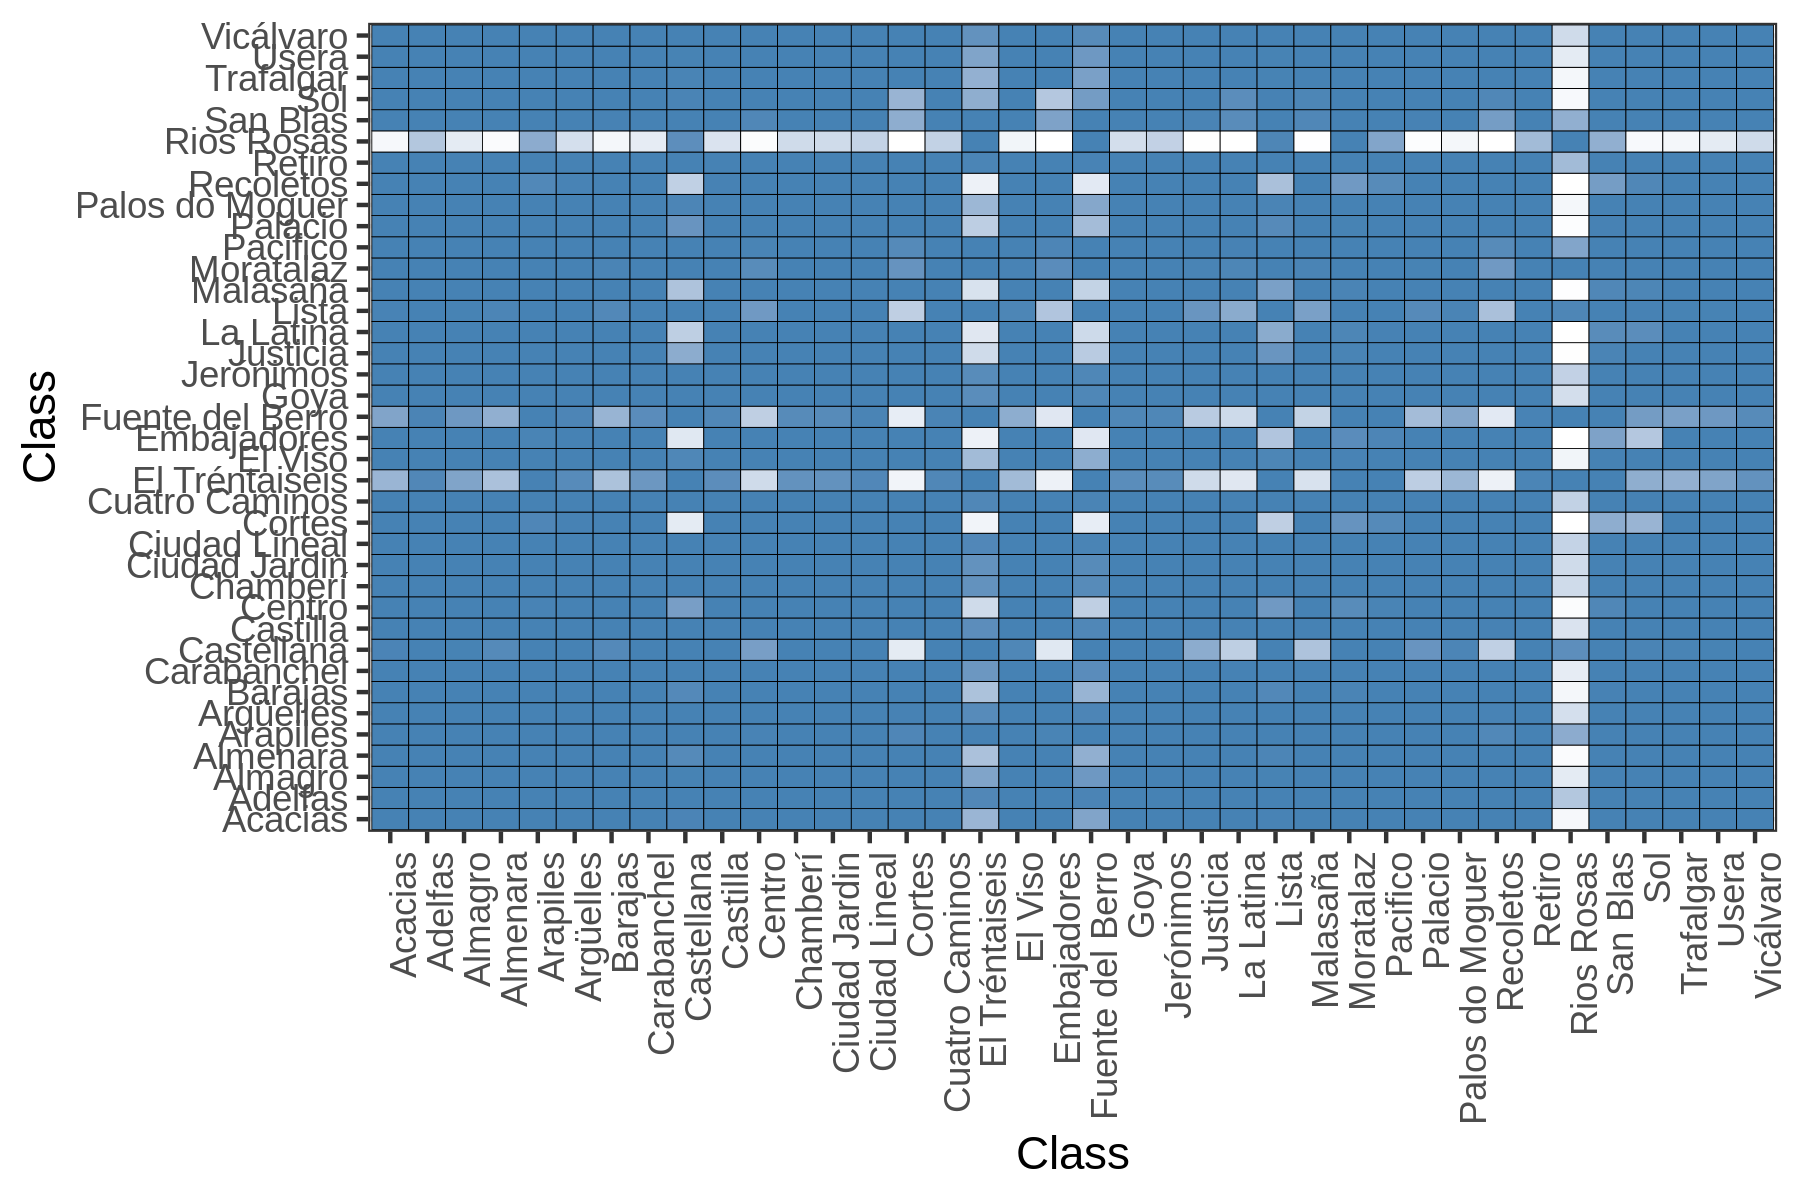

In [ ]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [ ]:
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’




In [ ]:
library(dendextend)


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




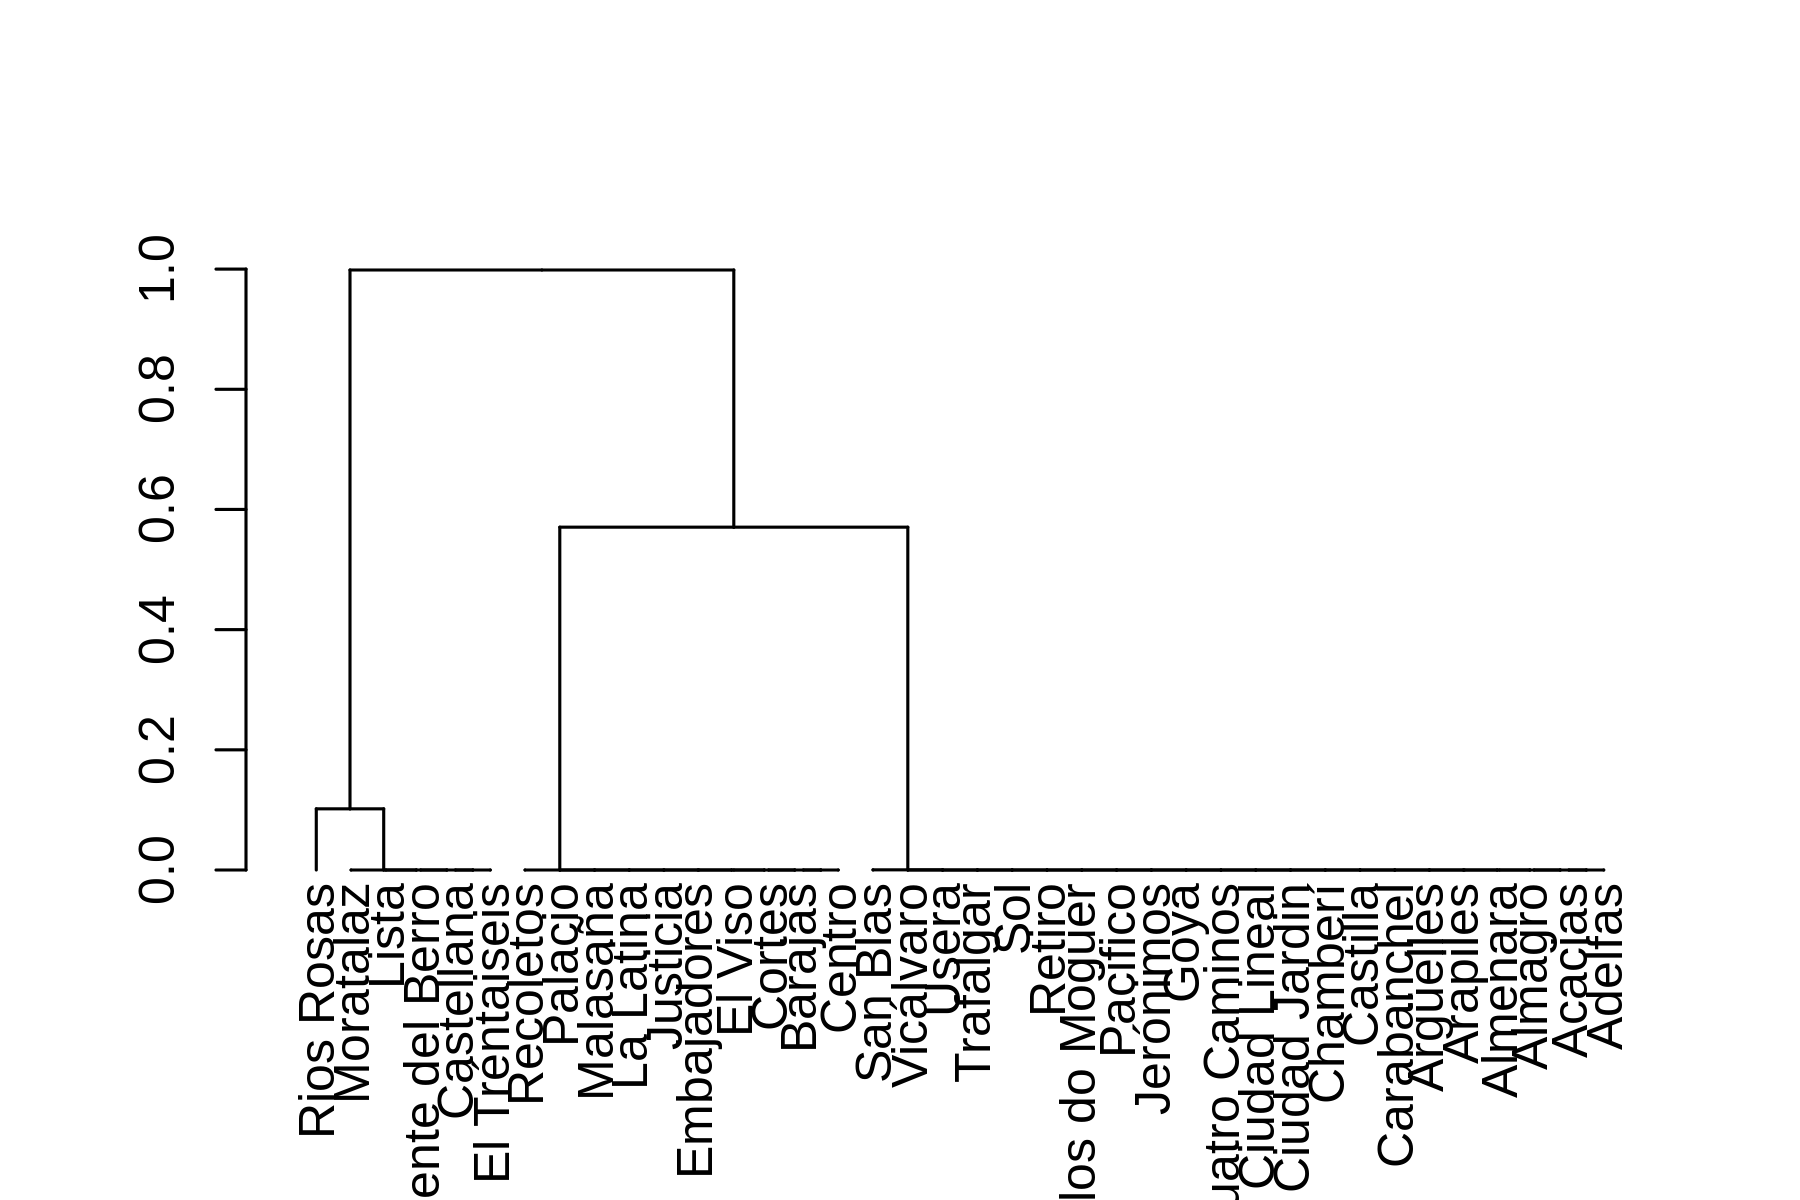

In [ ]:
d = as.dist(1 - resm)
arbol <- hclust(d, method="complete")
dendograma = as.dendrogram(arbol) 
plot(dendograma)


¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [ ]:
#El punto de corte aconsejable sería 0.3, en el que aparecen 3 clusters

In [ ]:
clusters=cutree(arbol, h=0.3)
clusters

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                2                1 
      Castellana         Castilla           Centro         Chamberí 
               3                1                2                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                2                1 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               3                2                2                3 
            Goya        Jerónimos         Justicia        La Latina 
               1                1                2                2 
           Lista         Malasaña        Moratalaz         Pacifico 
               3                2                3                1 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               2                1                2                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                1                1                1 
           Usera        Vicálvaro 
               1                1

[1] "Vemos como en el modelo los clusters en general son buenos."


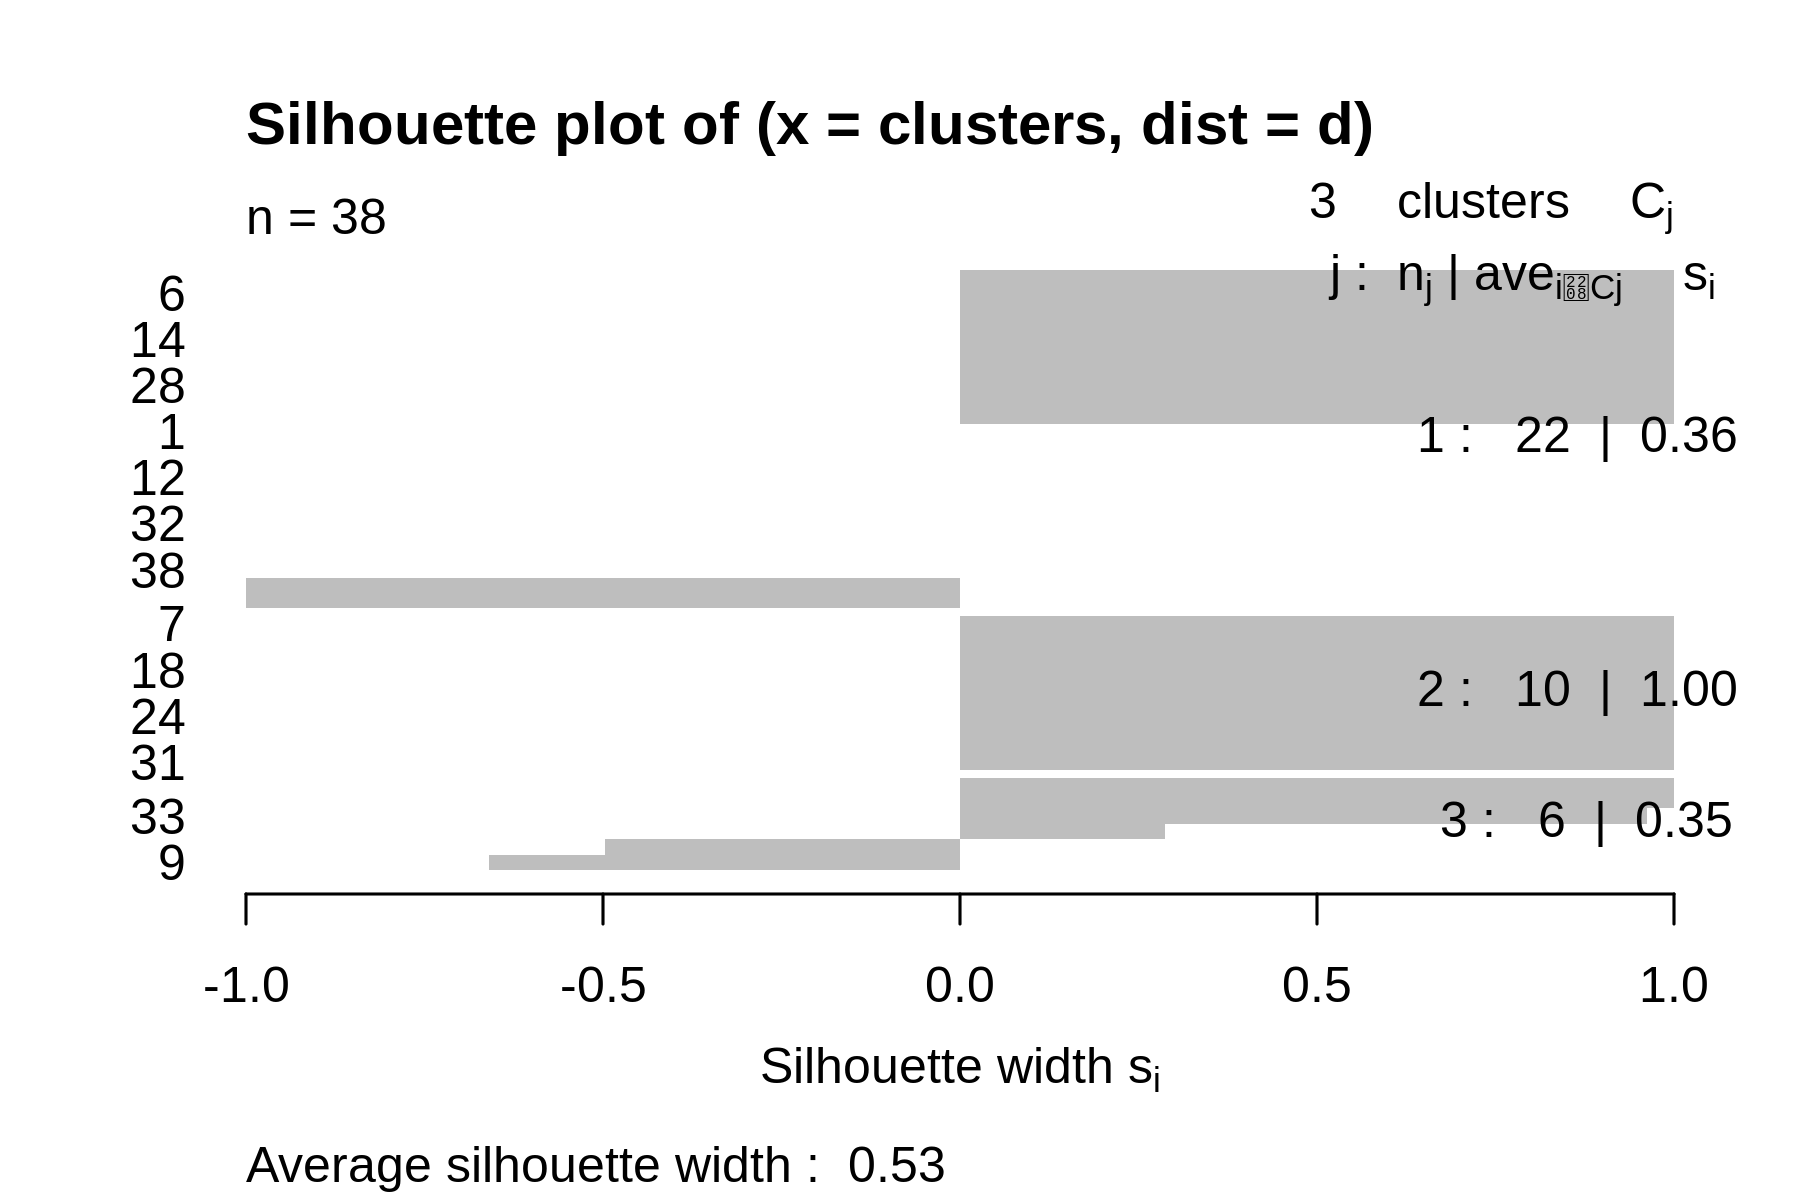

In [ ]:
print("Vemos como en el modelo los clusters en general son buenos.")
library(cluster)
sil<-silhouette(clusters,d)
plot(sil,border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [ ]:
df_barrios<-data.frame(names=names(clusters),neighb_id=paste0("Neighb_id_",clusters))
head(df_barrios)

,names,neighb_id
,<chr>,<chr>
1,Acacias,Neighb_id_1
2,Adelfas,Neighb_id_1
3,Almagro,Neighb_id_1
4,Almenara,Neighb_id_1
5,Arapiles,Neighb_id_1
6,Argüelles,Neighb_id_1


In [ ]:
df_madrid_id <- df_madrid %>% 
    inner_join(df_barrios,by=c("Neighbourhood"='names')) %>%
    filter(!is.na(Square.Meters))
# El inner join es equivalente a:
#df_madrid<-merge(df_madrid,df_barrios,by.x = "Neighbourhood",by.y='names')

# Y esto sería equivalente a:
#df_madrid$neighb_id <- ct[df_madrid$Neighbourhood]

dim(df_madrid_id) 
head(df_madrid_id)

[1] 173  13

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,La Latina,6,2.0,2,2,72,54.99858,2,20,90,40.41206,-3.709149,Neighb_id_2
2,Acacias,4,1.0,1,2,60,49.98181,2,15,98,40.40513,-3.707726,Neighb_id_1
3,Malasaña,4,1.0,2,3,105,69.95596,1,0,97,40.42900,-3.703498,Neighb_id_2
4,Recoletos,2,1.0,0,2,61,30.00767,1,0,92,40.42800,-3.686409,Neighb_id_2
5,Malasaña,8,2.0,3,4,120,109.99715,6,0,83,40.42198,-3.705419,Neighb_id_2
6,Argüelles,4,1.5,2,2,95,96.99073,2,15,89,40.42920,-3.717775,Neighb_id_1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [ ]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
set.seed(12)
idx<-sample(1:nrow(df_madrid_id),nrow(df_madrid_id)*0.8)
df_madrid_id_train<-df_madrid_id[idx,]
df_madrid_id_test<-df_madrid_id[-idx,]

In [ ]:
model1<-lm(formula=Square.Meters~neighb_id+Bedrooms+Price, df_madrid_id_train)
summary(model1)


Call:
lm(formula = Square.Meters ~ neighb_id + Bedrooms + Price, data = df_madrid_id_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.944 -11.911  -2.917   9.062  82.761 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           35.49071    4.17522   8.500 3.53e-14 ***
neighb_idNeighb_id_2 -18.78472    3.56799  -5.265 5.54e-07 ***
neighb_idNeighb_id_3   7.49440    8.34671   0.898  0.37088    
Bedrooms              22.64547    2.06312  10.976  < 2e-16 ***
Price                  0.06951    0.02432   2.858  0.00495 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.98 on 132 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7075,	Adjusted R-squared:  0.6986 
F-statistic: 79.82 on 4 and 132 DF,  p-value: < 2.2e-16


In [ ]:
print("Comprobamos en el R² y otras medidas en train y test para ver si tenemos overfitting:")
caret::postResample(predict(model1,df_madrid_id_train),obs = df_madrid_id_train$Square.Meters)
caret::postResample(predict(model1,df_madrid_id_test),obs = df_madrid_id_test$Square.Meters)

[1] "Comprobamos en el R² y otras medidas en train y test para ver si tenemos overfitting:"


RMSE   Rsquared        MAE 
19.6156406  0.7074968 14.3403046

RMSE  Rsquared       MAE 
17.109416  0.512982 13.492496

In [ ]:
model2<-lm(formula=Square.Meters~neighb_id+Bedrooms+Price:Accommodates, df_madrid_id_train) 
summary(model2)


Call:
lm(formula = Square.Meters ~ neighb_id + Bedrooms + Price:Accommodates, 
    data = df_madrid_id_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.622 -11.695  -2.679   8.674  85.842 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           39.212545   4.124691   9.507  < 2e-16 ***
neighb_idNeighb_id_2 -18.491059   3.615420  -5.114 1.08e-06 ***
neighb_idNeighb_id_3  11.483782   8.333820   1.378   0.1705    
Bedrooms              21.829019   2.392304   9.125 1.06e-15 ***
Price:Accommodates     0.007939   0.003551   2.235   0.0271 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.21 on 132 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7007,	Adjusted R-squared:  0.6917 
F-statistic: 77.27 on 4 and 132 DF,  p-value: < 2.2e-16


In [ ]:
#Este modelo es mejor pues tiene un p-valor más bajo

In [ ]:
print("Comprobamos en el R² y otras medidas en train y test para ver si tenemos overfitting:")
caret::postResample(predict(model2,df_madrid_id_train),obs = df_madrid_id_train$Square.Meters)
caret::postResample(predict(model2,df_madrid_id_test),obs = df_madrid_id_test$Square.Meters)

[1] "Comprobamos en el R² y otras medidas en train y test para ver si tenemos overfitting:"


RMSE  Rsquared       MAE 
19.841468  0.700723 14.408414

RMSE   Rsquared        MAE 
17.1472109  0.5030739 13.3980032

In [ ]:
#obtenemos valores muy similares al modelo anterior

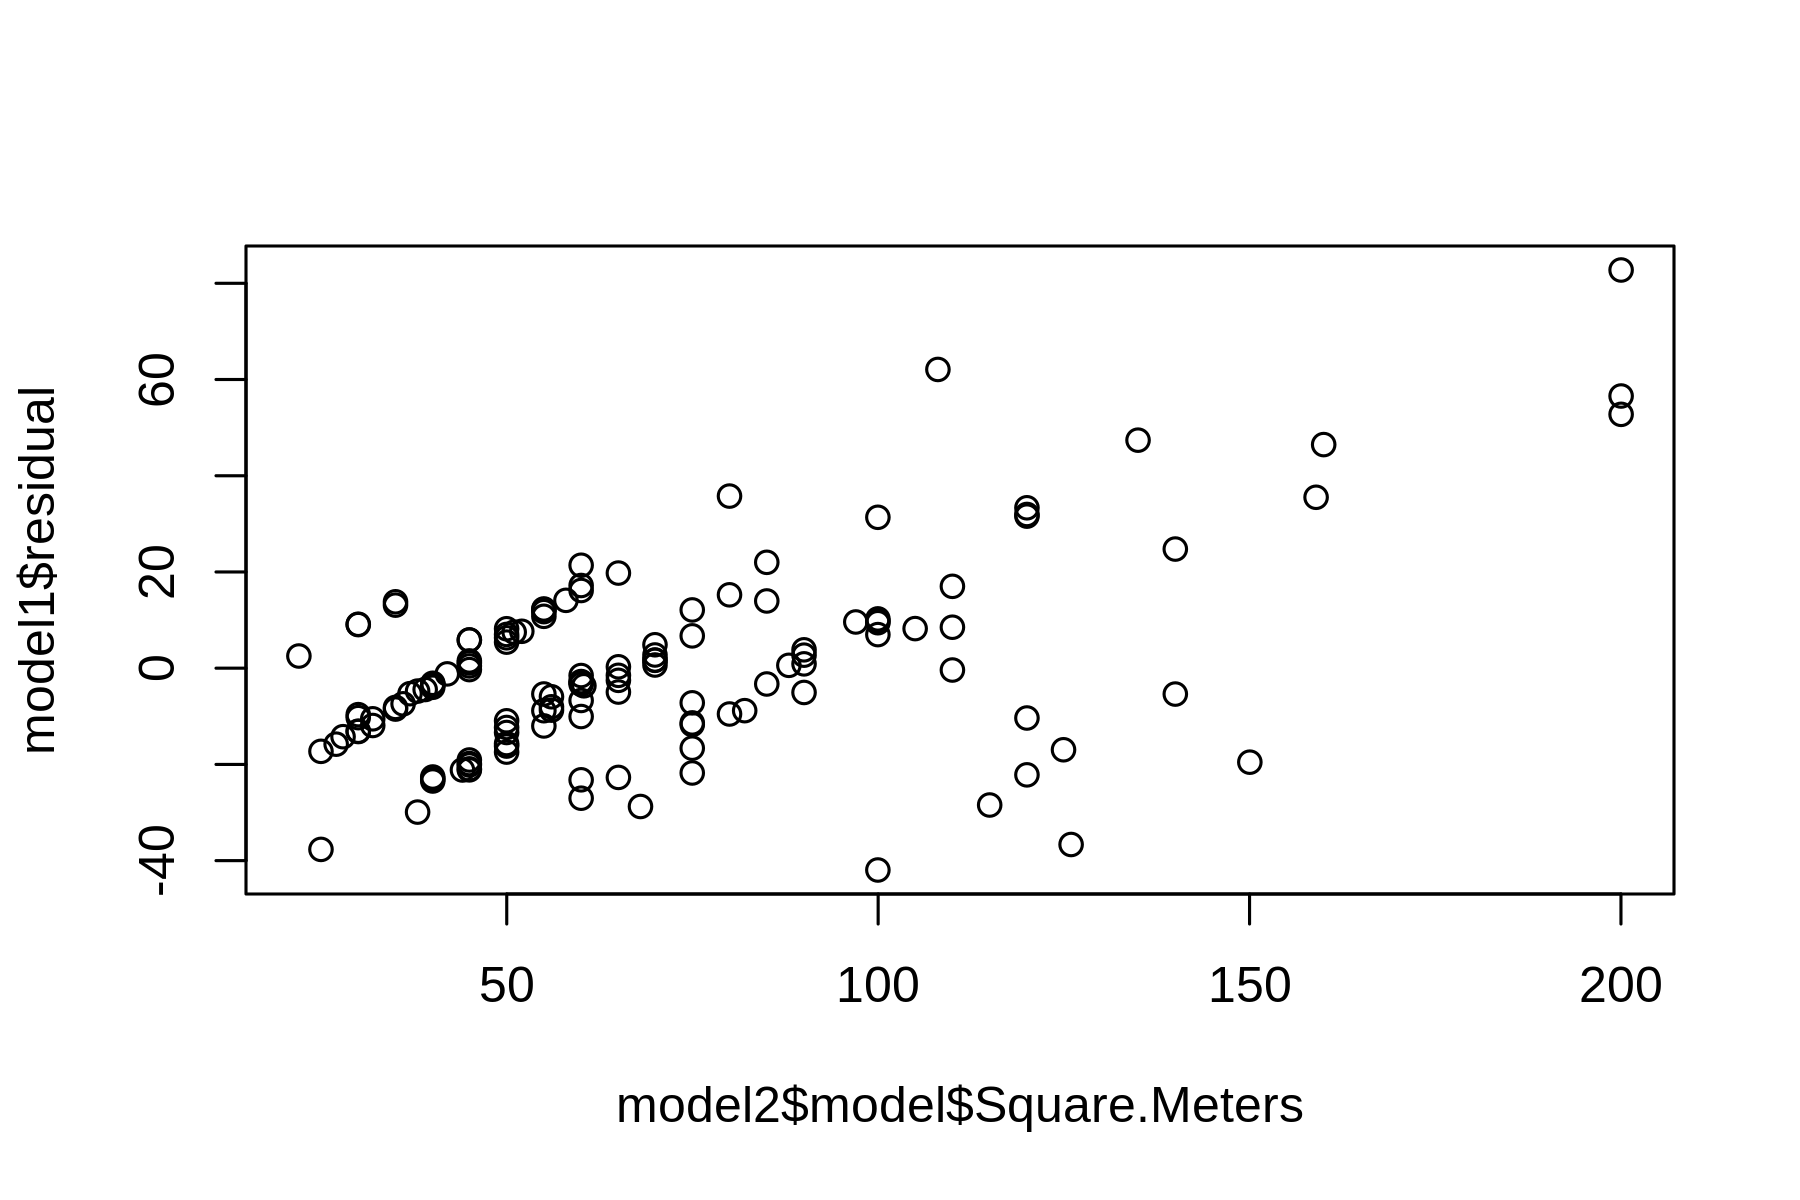

In [ ]:
plot(model2$model$Square.Meters,model1$residual)

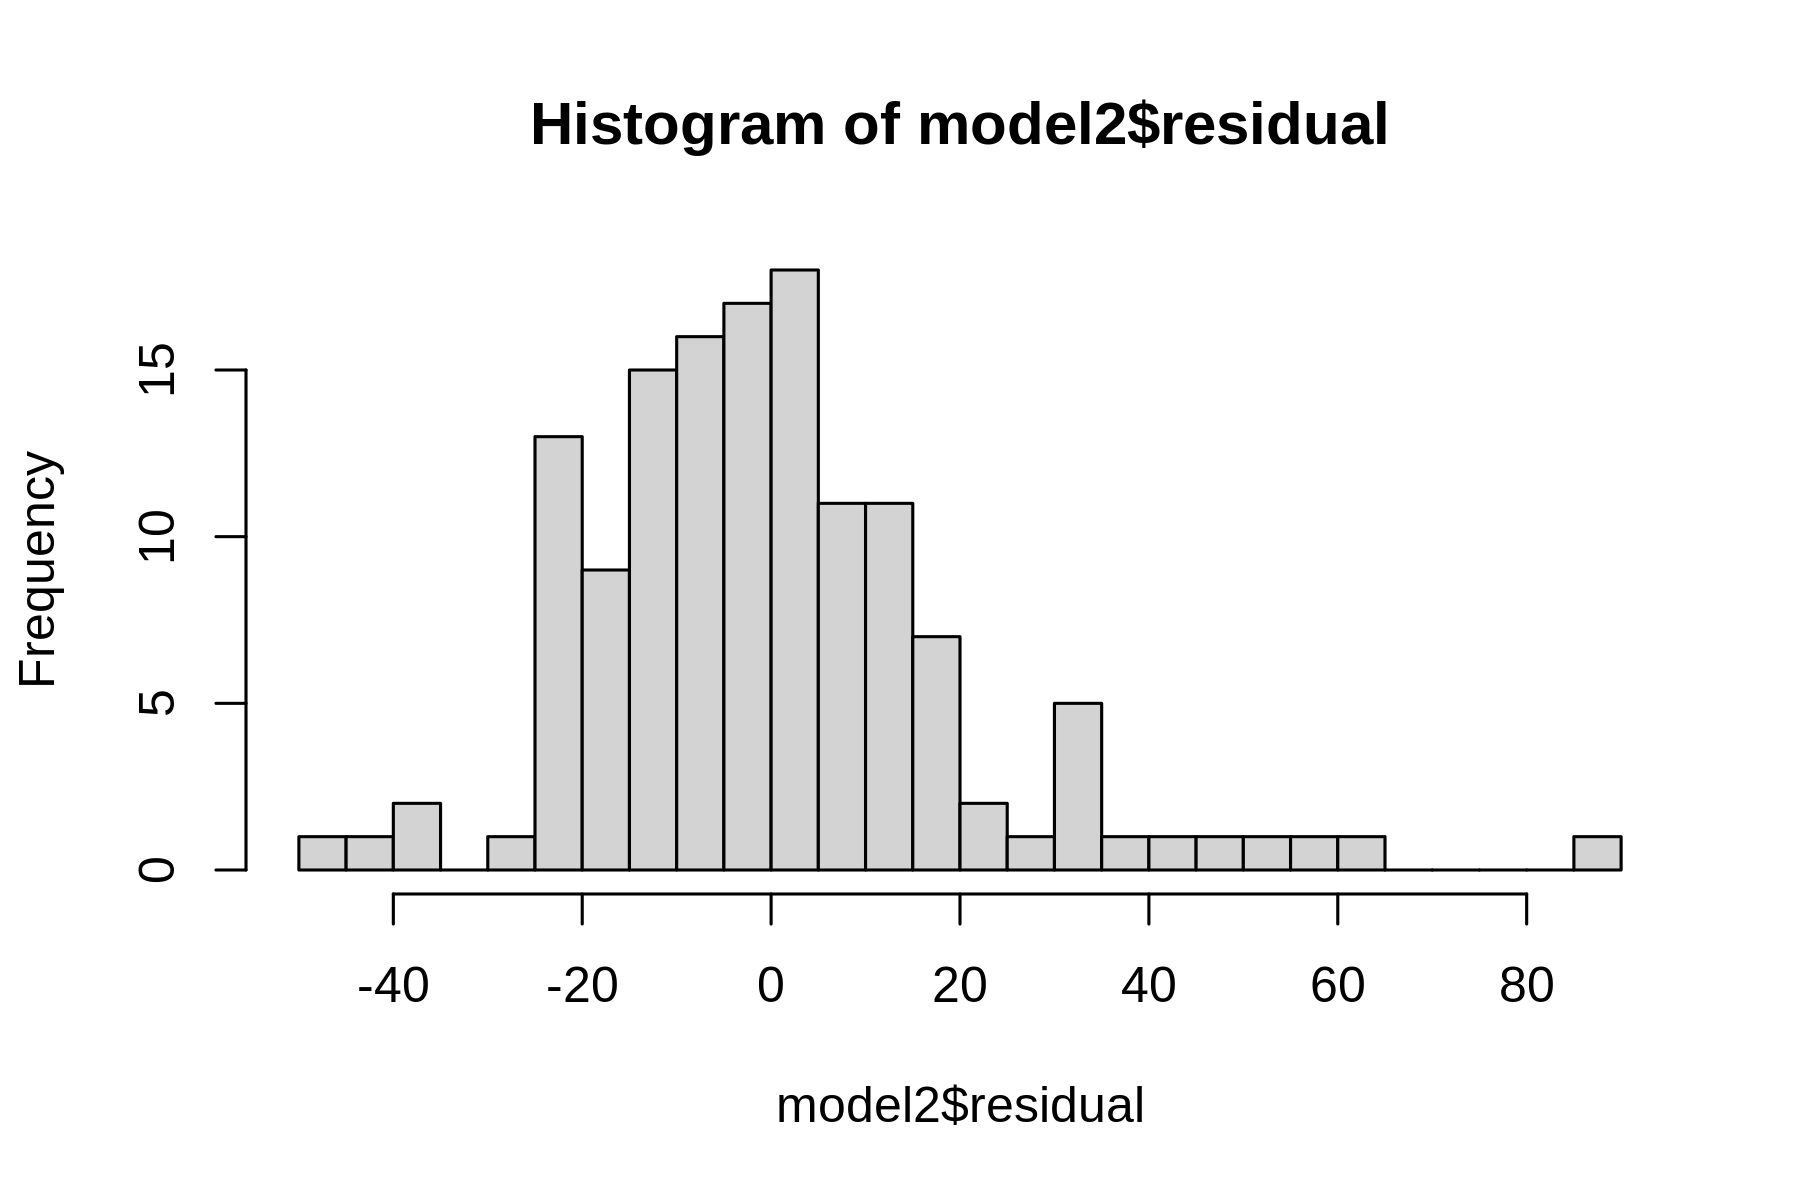

In [ ]:
hist(model2$residual,breaks=20)

[1] "Tenemos un elemento que tiene un residuo muy alto, ¿nos afectará a la predicción?"


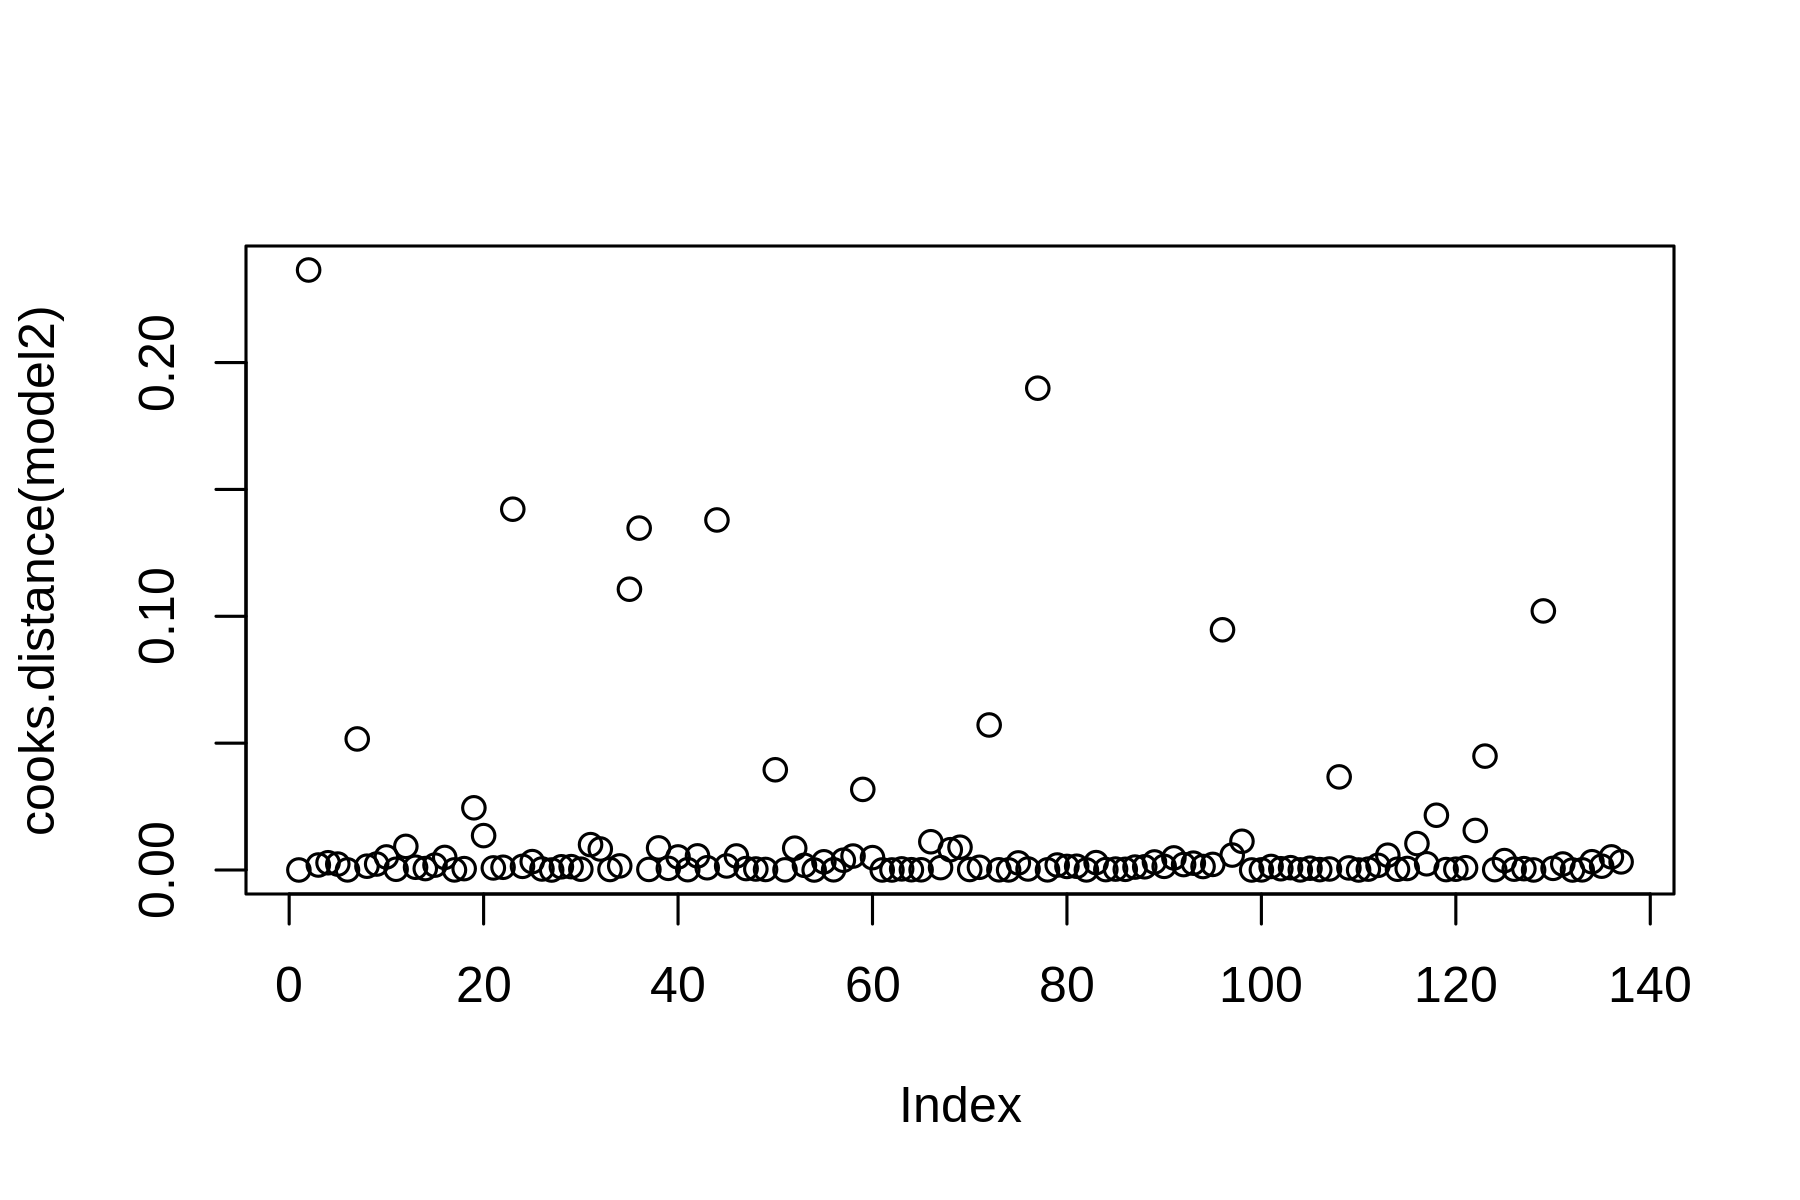

In [ ]:
print("Tenemos un elemento que tiene un residuo muy alto, ¿nos afectará a la predicción?")
plot(cooks.distance(model2))

In [ ]:
cook_d<-cooks.distance(model2)

df_madrid_id_train[names(cook_d),] %>% filter(cook_d>0.2)
# La línea anterior es equivalente a:
#df_madrid_id_train[names(which(cook_d>0.2)),]

Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
Rios Rosas,6,4,4,1,197,200.0202,1,12,88,40.44153,-3.694571,Neighb_id_3


In [ ]:
head(cook_d)

90           80           91           69           34          136 
1.211411e-05 2.364758e-01 1.968068e-03 2.859480e-03 2.333343e-03 4.131326e-05

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

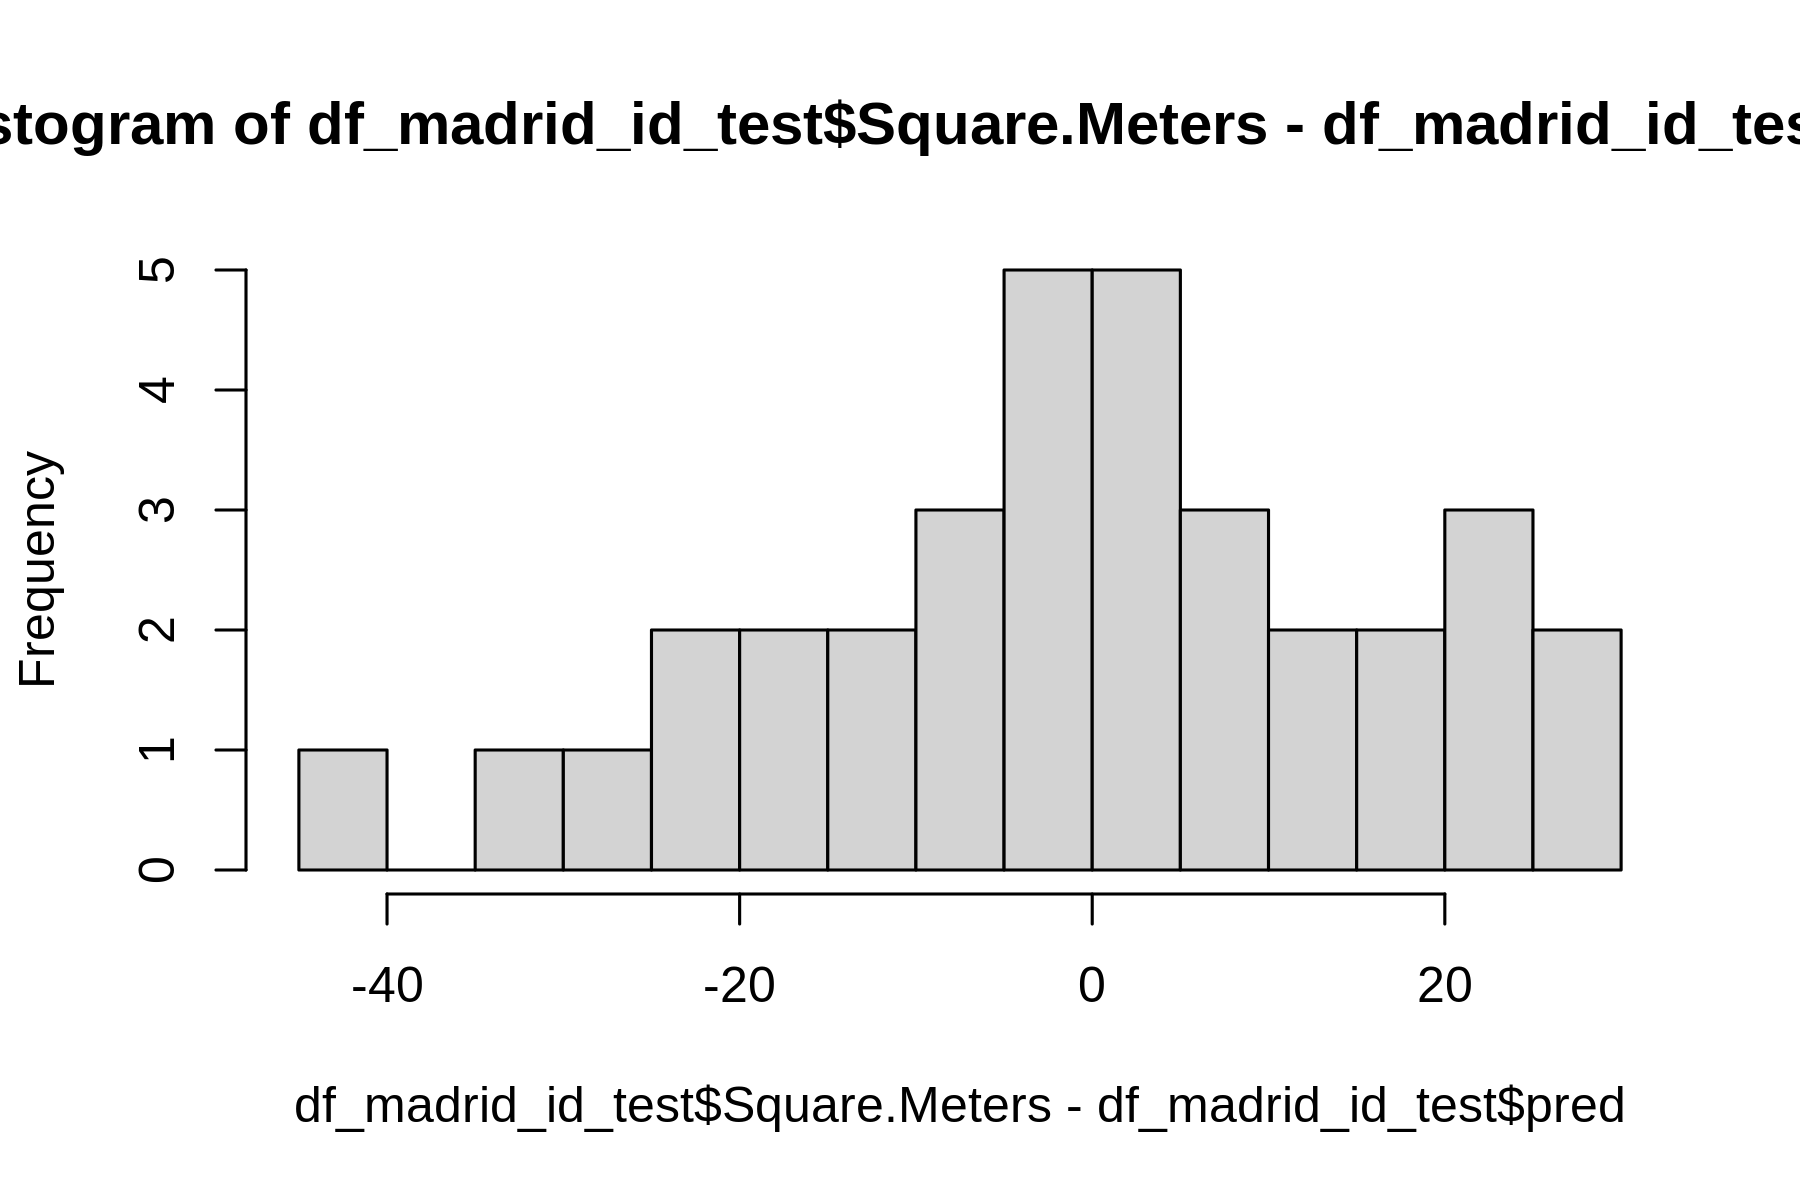

In [ ]:
df_madrid_id_test$pred<-model2 %>% predict(df_madrid_id_test)
hist(df_madrid_id_test$Square.Meters-df_madrid_id_test$pred,breaks=15)

No es nada gaussiano

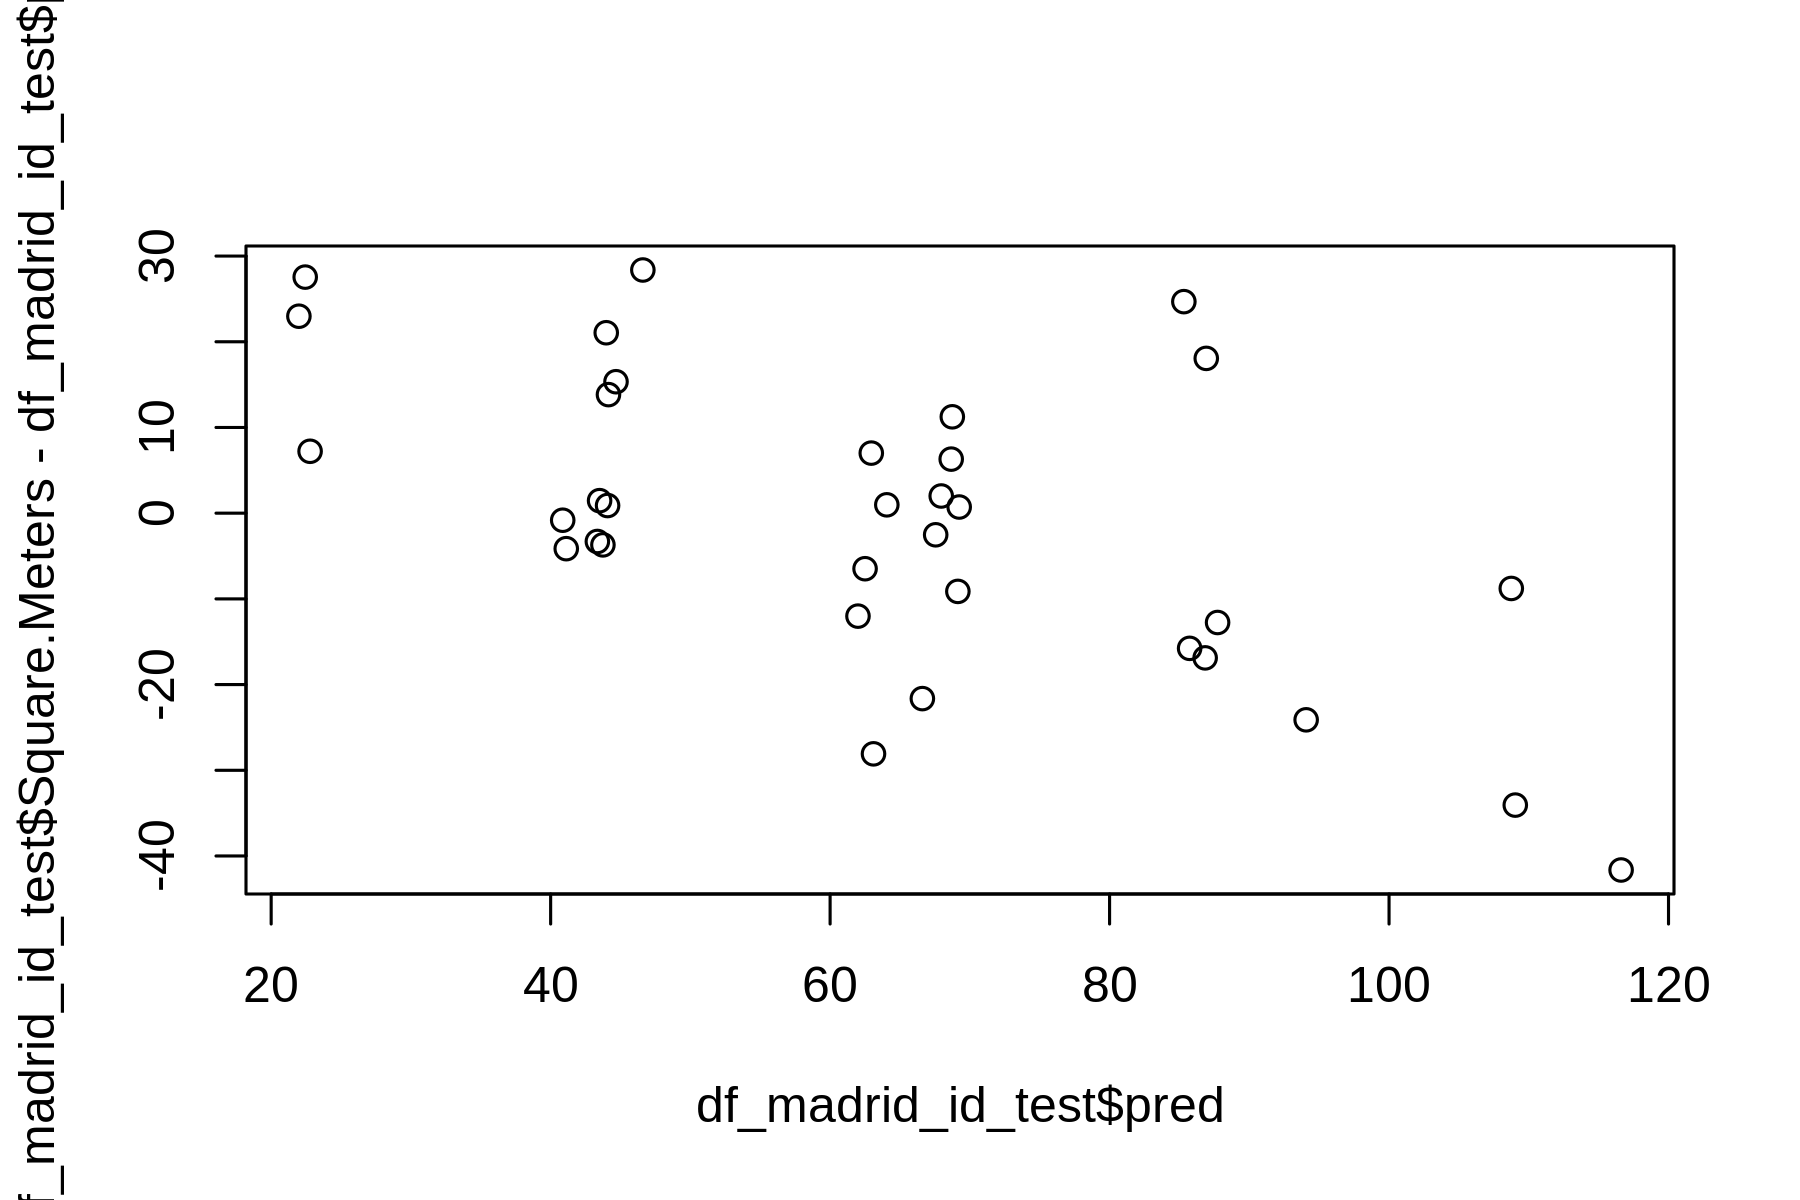

In [ ]:
plot(df_madrid_id_test$pred,df_madrid_id_test$Square.Meters-df_madrid_id_test$pred)

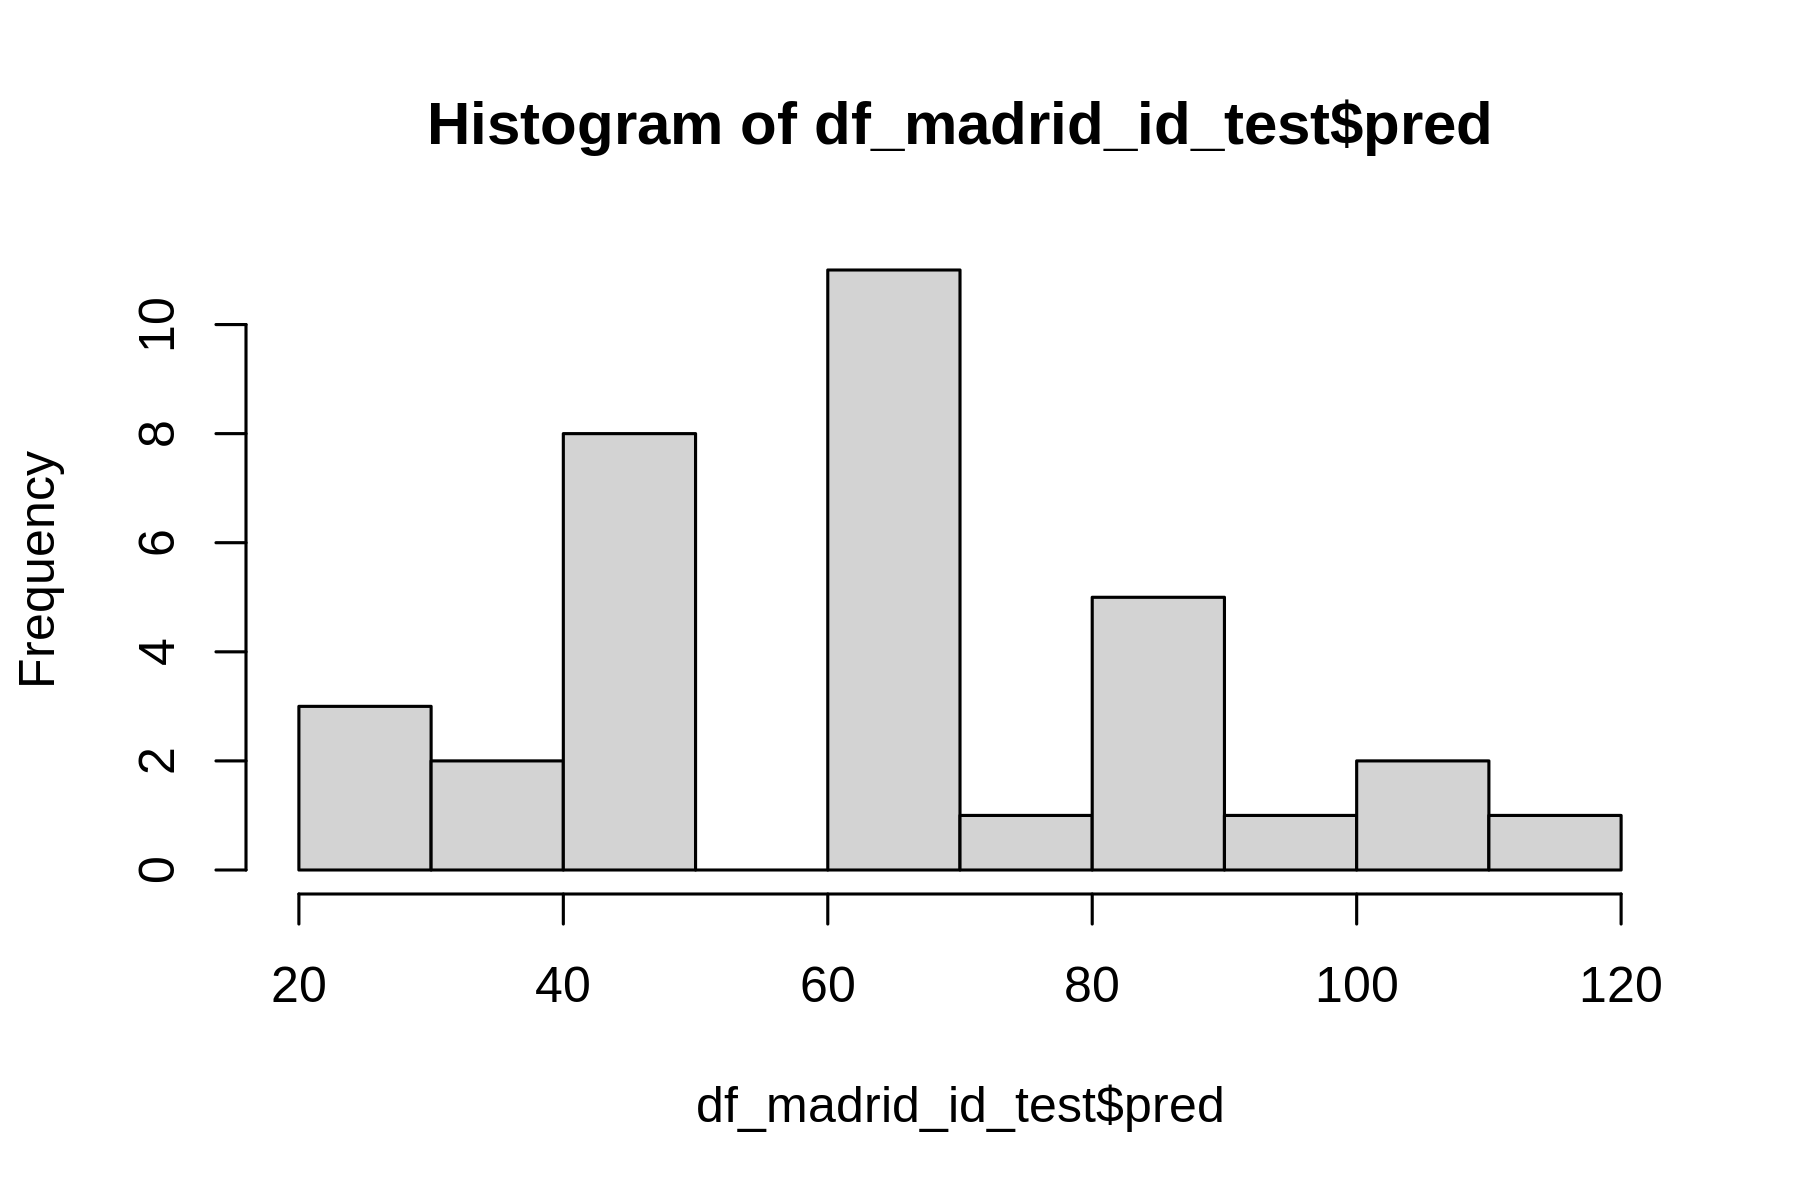

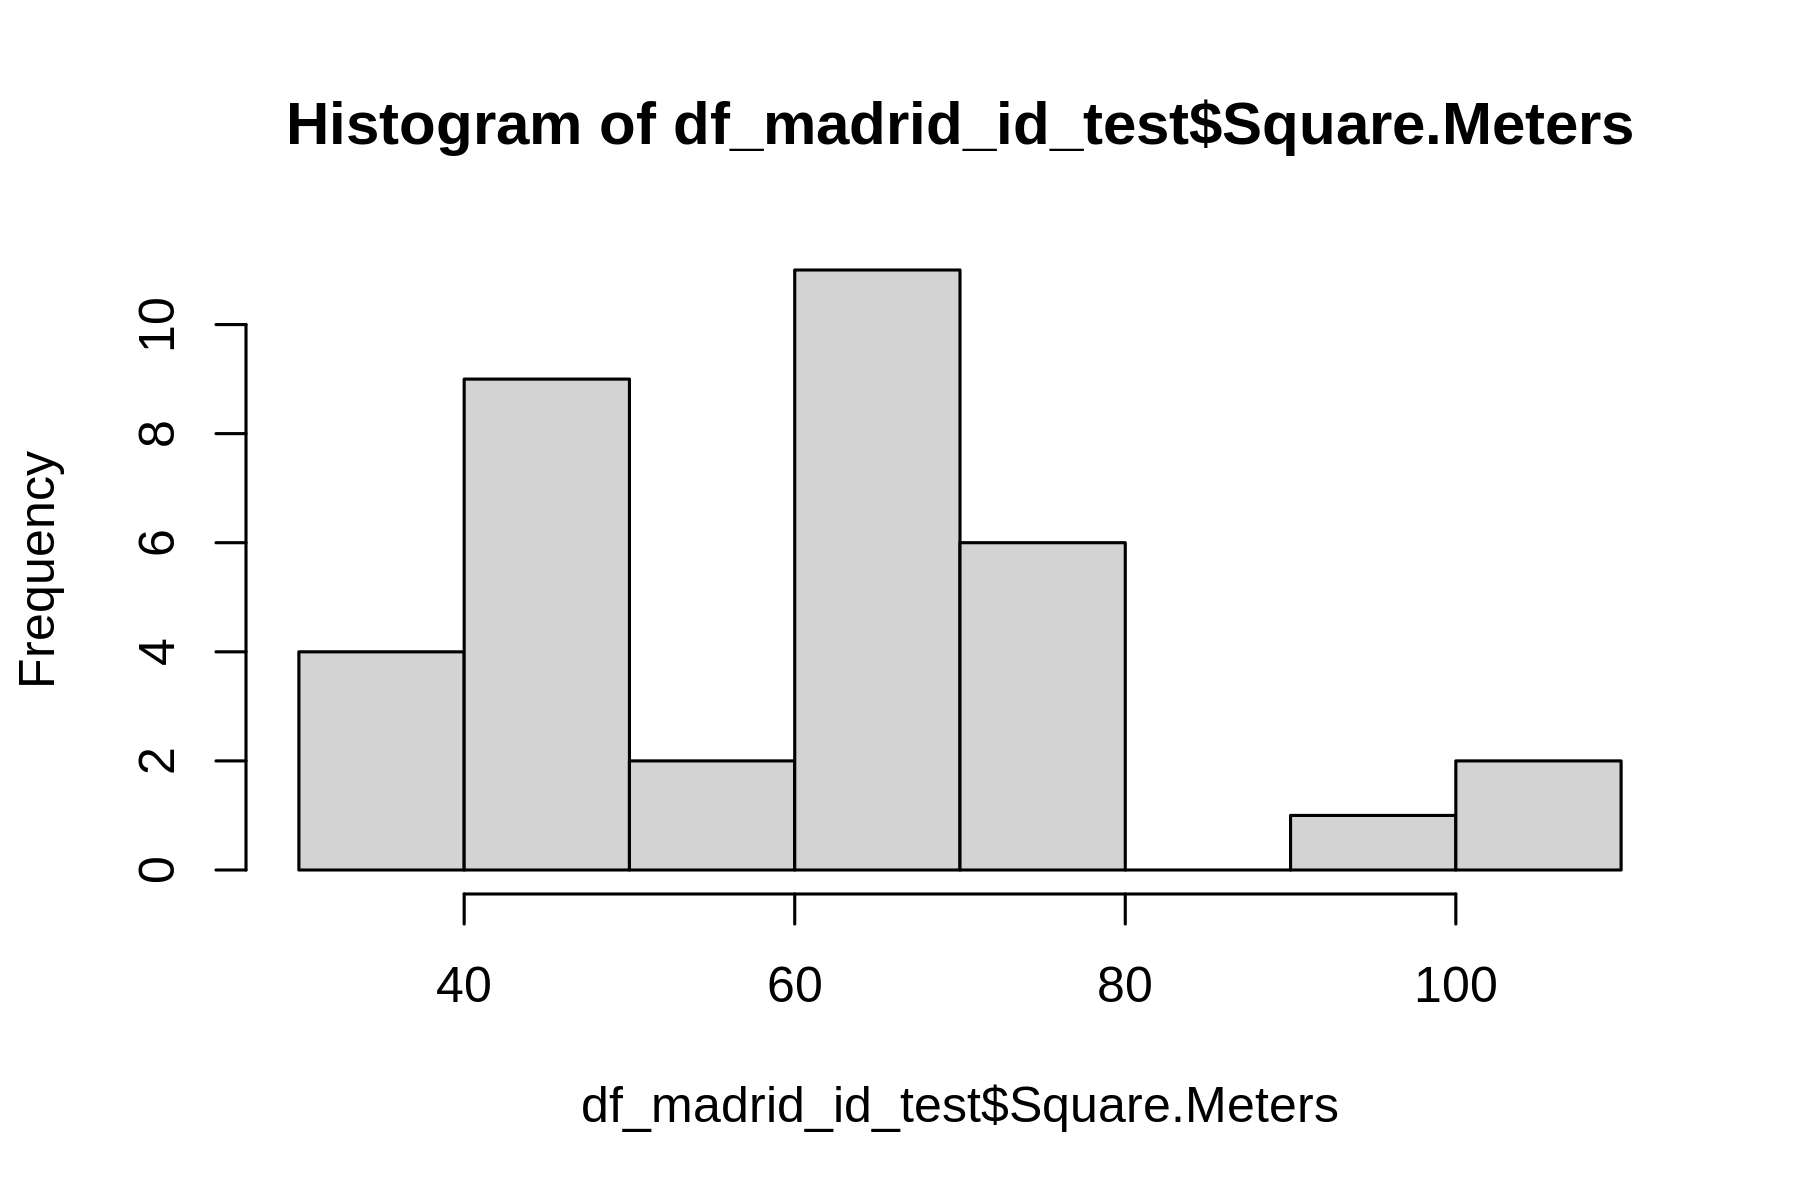

In [ ]:
hist(df_madrid_id_test$pred)
hist(df_madrid_id_test$Square.Meters)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [ ]:
df_barrios

names,neighb_id
<chr>,<chr>
Acacias,Neighb_id_1
Adelfas,Neighb_id_1
Almagro,Neighb_id_1
Almenara,Neighb_id_1
Arapiles,Neighb_id_1
Argüelles,Neighb_id_1
Barajas,Neighb_id_2
Carabanchel,Neighb_id_1
Castellana,Neighb_id_3


In [ ]:
# Primero buscamos el neighb_id del barrio de Sol:
neighb_id_sol<-df_barrios %>% filter(names=="Sol") %>% select(neighb_id)
paste0("El id de barrio es:",neighb_id_sol)
#no se por que no me funciona neighb_id!!!!!

ERROR: ignored

In [ ]:
# Luego creamos el dataframe:
df_appartment<-data.frame(neighb_id=neighb_id_sol,Bedrooms=3,Price=80,Accommodates=6)
# Por último damos la predicción
pred_m2<-predict(model2,df_appartment)
paste("Los metros cuadrados son:",round(pred_m2))

ERROR: ignored

In [ ]:
cf<-coefficients(model2)
cf_bedroom_sol<-cf['Bedrooms']

paste("En media cada habitación aumenta el tamaño del apartemos en:",round(cf_bedroom_sol,2),"m^2")

[1] "En media cada habitación aumenta el tamaño del apartemos en: 21.83 m^2"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [ ]:
df_madrid_id_all <- df_madrid %>% inner_join(df_barrios,by=c("Neighbourhood"='names')) 

df_madrid_id_all$Square.Meters[is.na(df_madrid_id_all$Square.Meters)]<-
 round(predict(model2,df_madrid_id_all[is.na(df_madrid_id_all$Square.Meters),]))

head(df_madrid_id_all)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,Embajadores,2,1,1,2,50,43,1,20,93,40.41126,-3.697305,Neighb_id_2
2,Embajadores,5,1,2,4,95,68,4,0,97,40.41256,-3.701155,Neighb_id_2
3,La Latina,4,1,1,2,69,45,2,18,91,40.40791,-3.705095,Neighb_id_2
4,Embajadores,4,1,1,2,57,44,2,8,98,40.41162,-3.703281,Neighb_id_2
5,La Latina,2,1,1,1,59,43,1,0,95,40.40734,-3.707019,Neighb_id_2
6,La Latina,14,2,3,14,120,100,2,18,92,40.40908,-3.704744,Neighb_id_2


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [ ]:
df_madrid_pca<-na.omit(df_madrid_id_all[,c("Accommodates","Bathrooms","Bedrooms","Latitude","Longitude",
                                           "Beds","Price","Review.Scores.Rating","Square.Meters",'neighb_id')])


In [ ]:
pca_df<-prcomp(df_madrid_pca %>% select(-neighb_id),center = TRUE, scale. = TRUE)
#de nuevo problemas con(neighb_id)

ERROR: ignored

In [ ]:
summary(df_madrid_pca)

  Accommodates      Bathrooms       Bedrooms        Latitude    
 Min.   : 1.000   Min.   :0.00   Min.   :0.000   Min.   :40.36  
 1st Qu.: 3.000   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:40.41  
 Median : 4.000   Median :1.00   Median :1.000   Median :40.42  
 Mean   : 4.127   Mean   :1.24   Mean   :1.417   Mean   :40.42  
 3rd Qu.: 5.000   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:40.42  
 Max.   :16.000   Max.   :6.00   Max.   :8.000   Max.   :40.48  
   Longitude           Beds            Price        Review.Scores.Rating
 Min.   :-3.761   Min.   : 1.000   Min.   : 18.00   Min.   : 20.00      
 1st Qu.:-3.707   1st Qu.: 1.000   1st Qu.: 57.00   1st Qu.: 88.00      
 Median :-3.702   Median : 2.000   Median : 74.00   Median : 93.00      
 Mean   :-3.700   Mean   : 2.384   Mean   : 87.17   Mean   : 91.44      
 3rd Qu.:-3.698   3rd Qu.: 3.000   3rd Qu.: 99.00   3rd Qu.: 97.00      
 Max.   :-3.576   Max.   :16.000   Max.   :800.00   Max.   :100.00      
 Square.Meters     neighb_id      

In [ ]:
plot(pca_df$sdev^2/sum(pca_df$sdev^2),main="Autovalores")

ERROR: ignored

In [ ]:
str(pca_df)

In [ ]:
get_closest_element<-function(pca_df, new_flat,num_flats){
    pca_new<-predict(pca_df,newdata = new_vector)
    pca_orig<-pca_df$x[,1:2]
    pca_new <-pca_new[,1:2]

    idx<-order(rowSums((pca_new-pca_orig)^2))
    df_madrid_pca[idx %in% 1:num_flats,]
}

In [ ]:
new_vector<-(df_madrid_pca %>% select(-neighb_id))[10,]
new_vector
get_closest_element(pca_df,new_vector,5)

In [ ]:
# Realizadmos un test de ANOVA de cada componente principal (PC) por neighb_id

pca_x_neighb<-cbind(data.frame(pca_df$x),neighb_id=df_madrid_pca$neighb_id)
pca_cols<-colnames(pca_x_neighb)[1:ncol(pca_x_neighb)-1]
df_F_val<-data.frame(pca=pca_cols,F=NA)
for (idx in (1:nrow(df_F_val))){
    formula<-paste(pca_cols[idx],"~ neighb_id")
    df_F_val$F[idx]<-oneway.test(pca_x_neighb,formula = as.formula(formula))$statistic
}
df_F_val

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?